## 本專題主要針對KKBOX所提供共5份資料(如下)，主要目標為針對客戶是否流失進行分析。

|   RawData                  |  說明                |特徵說明   |
|----------------------------|----------------------|----------|
| sample_submission_zero.csv | Testing Data         |user_id, 流失值|
|train.csv                   | Training Data        |user_id, 流失值|
|members.csv                 | 客戶個人資料          |年齡,居住地等|
|ransactions.csv             | 客戶交易資料          |付費方案,費用等|
|user_logs.csv               | 使用者紀錄            |每日聽歌秒數,聽歌長短|

### ***※各資料中的欄位特徵變數於最下方有個別解釋以及資料分佈的觀察。***

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
def dtype_compressor(df):
  #object 
  # when unique ratio > 0.5, catogory stands less memory than object
  converted_obj = pd.DataFrame()
  df_obj = df.select_dtypes(include=['object'])
  for col in df_obj.columns:
    converted_obj.loc[:,col] = df_obj.loc[:,col].astype('category')

  # numbers
  df_down_num = pd.DataFrame()
  df_num = df.select_dtypes(include=['number'])
  for col in df_num.columns:
    df_down_num.loc[:,col] = pd.to_numeric(df_num.loc[:,col],downcast='signed')

  # merge
  df = pd.concat([converted_obj,df_down_num],axis=1)
  
  del converted_obj, df_obj, df_down_num, df_num  
  
  return df

In [3]:
def fast_datetime(s):
    dates = {date:pd.to_datetime(date,format='%Y%m%d') for date in s.unique()}
    return s.map(dates)

In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 讀取csv-Testing Set

---

### 讀取csv-Training Set

In [5]:
# KKboxTrain01 = pd.read_csv("train.csv")

In [6]:
print(KKboxTrain01.shape)
# KKboxTrain01.head()

NameError: name 'KKboxTrain01' is not defined

In [7]:
# 如有記憶體優化需求可用
# del KKboxTrain01

In [8]:
KKboxTrain02 = pd.read_csv("train_v2.csv")

In [9]:
print(KKboxTrain02.shape)
# KKboxTrain02.head()

(970960, 2)


In [10]:
# 如有記憶體優化需求可用
# del KKboxTrain02

##### 合併Training Set

In [11]:
# KKboxTrain = pd.concat([KKboxTrain01, KKboxTrain02], axis=0)
KKboxTrain = KKboxTrain02

In [12]:
print(KKboxTrain.shape)
KKboxTrain.head()

(970960, 2)


,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [13]:
KKboxTrain.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970960 entries, 0 to 970959
Data columns (total 2 columns):
msno        970960 non-null object
is_churn    970960 non-null int64
dtypes: int64(1), object(1)
memory usage: 100.9 MB


-----------

### 讀取csv-Members(客戶資料)

In [14]:
KKboxMembers = pd.read_csv("KKboxMembers.csv")

In [15]:
print(KKboxMembers.shape)
KKboxMembers.head()

(6769473, 6)


,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [16]:
KKboxMembers = dtype_compressor(KKboxMembers)

In [17]:
d = ['registration_init_time']
for col in d:
  KKboxMembers[col] = fast_datetime(KKboxMembers[col])

In [18]:
KKboxMembers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      category
gender                    category
city                      int8
bd                        int16
registered_via            int8
registration_init_time    datetime64[ns]
dtypes: category(2), datetime64[ns](1), int16(1), int8(2)
memory usage: 1.1 GB


---

### 讀取csv-Transaction(交易資料)

In [19]:
KKboxTransac_1 = pd.read_csv("transactions.csv")
KKboxTransac_2 = pd.read_csv("transactions_v2.csv")

In [20]:
KKboxTransac = pd.concat([KKboxTransac_1, KKboxTransac_2], axis=0)
# KKboxTransac = KKboxTransac_2

In [21]:
KKboxTransac = dtype_compressor(KKboxTransac)

In [22]:
KKboxTransac = KKboxTransac.sort_values(by=['transaction_date'])

In [23]:
print(KKboxTransac.shape)
KKboxTransac.head()

(22978755, 9)


,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
17509039,JQqsvSC2BNWif2jSUS0BJ3JT1/oREqxrrL4jNjbjFWU=,41,30,149,149,1,20150101,20150202,0
10580212,Z1CV2CrBP9tR4Xr5H4VqgGzx650b2HtwJWJV/ExQNaw=,41,30,149,149,1,20150101,20150201,0
10580211,flo7XEv3URucBlewH+Y/QgdmrAapKq3+NMs97Z+A9Sc=,41,30,149,149,1,20150101,20150201,0
7184222,Bv0w1EeVjiPLB8r5mR1ny2x8guIdqzGNpKa1LgJ1d9M=,41,30,149,149,1,20150101,20150203,0
7184223,fSn3mhLjNEREk1f/84iU1FFas2l4zAaMk4JT15WLlvE=,41,30,149,149,1,20150101,20150201,0


In [24]:
KKboxTransac.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22978755 entries, 17509039 to 696545
Data columns (total 9 columns):
msno                      category
payment_method_id         int8
payment_plan_days         int16
plan_list_price           int16
actual_amount_paid        int16
is_auto_renew             int8
transaction_date          int32
membership_expire_date    int32
is_cancel                 int8
dtypes: category(1), int16(3), int32(2), int8(3)
memory usage: 949.2 MB


In [25]:
date_rename = {'transaction_date':'trans_date', 'membership_expire_date':'mem_expire_date'}
KKboxTransac.rename(columns=date_rename,inplace=True)

In [26]:
del date_rename

In [27]:
d = ['trans_date', 'mem_expire_date']
for col in d:
  KKboxTransac[col] = fast_datetime(KKboxTransac[col])

In [28]:
KKboxTransac = KKboxTransac.sort_values(by=['msno','trans_date'])

In [29]:
# 如有記憶體優化需求可用
# del KKboxTransac

---

### 讀取csv-UserLogSum

In [31]:
UserLogSum = pd.read_csv('UserLogSum.csv')

In [34]:
UserLogSum = dtype_compressor(UserLogSum)

In [35]:
UserLogSum.head()

,msno,sum_25,sum_50,sum_75,sum_985,sum_100,sum_unq,sum_secs,timeperiod
0,+++ceu6HDcfpatMwLD3loHSqgjp1iI4VrnAFTwRqcXw=,0,0,0,0,76,9,20374,18
1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,0,0,1,105,94,27345,1
2,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,18,7,3,5,114,117,32336,4
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,306,144,155,271,1236,1517,395171,79
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,499,160,133,99,31465,28202,7773370,756


In [43]:
song_Col = ['sum_25', 'sum_50', 'sum_75', 'sum_985', 'sum_100']
song_Col_avg = ['sum_25_avg', 'sum_50_avg', 'sum_75_avg', 'sum_985_avg', 'sum_100_avg']
for x, y in zip(song_Col_avg, song_Col):
    UserLogSum[x] = UserLogSum[y] / UserLogSum['timeperiod']

In [44]:
UserLogSum.head()

,msno,sum_25,sum_50,sum_75,sum_985,sum_100,sum_unq,sum_secs,timeperiod,sum_25_avg,sum_50_avg,sum_75_avg,sum_985_avg,sum_100_avg
0,+++ceu6HDcfpatMwLD3loHSqgjp1iI4VrnAFTwRqcXw=,0,0,0,0,76,9,20374,18,0.000,0.000,0.000,0.000,4.222
1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,0,0,1,105,94,27345,1,3.000,0.000,0.000,1.000,105.000
2,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,18,7,3,5,114,117,32336,4,4.500,1.750,0.750,1.250,28.500
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,306,144,155,271,1236,1517,395171,79,3.873,1.823,1.962,3.430,15.646
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,499,160,133,99,31465,28202,7773370,756,0.660,0.212,0.176,0.131,41.620


---

##### Train + Members合併

In [46]:
KKboxTrainMembers = pd.merge(KKboxTrain, KKboxMembers[['msno', 'city','bd', 'gender', 'registered_via', 'registration_init_time']], how="left", on="msno")
gender_encode = {'male':'1', 'female':'0'}
KKboxTrainMembers['gender'] = KKboxTrainMembers['gender'].map(gender_encode)
print(KKboxTrainMembers.shape)
KKboxTrainMembers.head()

(970960, 7)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.000,28.000,1,3.000,2013-12-23
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.000,20.000,1,3.000,2013-12-23
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.000,18.000,1,3.000,2013-12-27
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.000,0.000,NaN,7.000,2014-01-09
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.000,35.000,0,7.000,2014-01-25


In [47]:
# 存成csv
# KKboxTrainMembers.to_csv('KKboxTrainMembers.csv',index=False,header=True)

---

## 製作新特徵

##### 製作交易次數區分層別client_level_code

In [48]:
# 定義以不同交易次數之客戶
def client_level_code(df):
    ft_trans_times_train = df[['msno','trans_date']].groupby(by=['msno'],as_index=False).count().rename(columns={'trans_date':'trans_times'})
    # 將不同交易次數新/老客戶分類(分為新使用者、1~6次、6~12次、12~24次以及24次以上)
    max_trans = ft_trans_times_train['trans_times'].max()
    bins = [0,1,6,12,24,max_trans]
    ft_trans_times_train['client_level_code'] = pd.cut(ft_trans_times_train.trans_times, bins, labels= np.arange(len(bins)-1))
    # 拉掉交易次數
    ft_trans_times_train = ft_trans_times_train[['msno', 'client_level_code']]
    return ft_trans_times_train

In [49]:
ft_trans_times_train = client_level_code(KKboxTransac)
ft_trans_times_train.head()

,msno,client_level_code
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,3
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,4


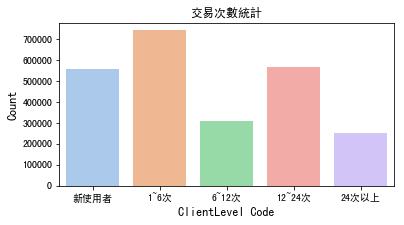

In [50]:
plt.figure(figsize=(6,3))
sns.countplot(x="client_level_code", data=ft_trans_times_train, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('ClientLevel Code', fontsize=12)
plt.xticks(np.arange(5), ('新使用者','1~6次', '6~12次', '12~24次', '24次以上'))
plt.title("交易次數統計", fontsize=12)
plt.show()

In [51]:
# 存成csv
# ft_trans_times_train.to_csv('NewFeature_ClientLevelCode.csv',index=False,header=True)

##### 製作last_last_churn(非連續(1) /連續(0)訂閱者)

In [52]:
# 定義非連續/連續訂閱者
def ll_churn(df):
  df = df.sort_values(by=['msno','trans_date'],ascending=True)
  df['next_trans_after'] = df['trans_date'].shift(-1) - df['mem_expire_date']
  df['the_same_user'] = df['msno'] == df['msno'].shift(-1)
  # 40 days allow more tolerance about churn
  df['churn_record'] = (df['next_trans_after'] > pd.Timedelta('30 days')) & (df['the_same_user'] == True)
  # convert boolen to 1 and 0 
  df['churn_record'] = df['churn_record']*1  
  # sort_by expire_date
  df = df.sort_values(by=['msno','mem_expire_date'],ascending=False)
  # take out last_last_churn
  ft = df.groupby(by=['msno'],as_index=False).nth(1)[['msno','churn_record']]
  ft = ft.rename(columns={'churn_record':'last_last_churn'})
  return ft

In [53]:
ft_last_last_churn = ll_churn(KKboxTransac)
ft_last_last_churn.head()

,msno,last_last_churn
13506846,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,0
19163744,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,0
2147164,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,0
13035974,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0
1373978,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,0


In [54]:
len(ft_last_last_churn[ft_last_last_churn['last_last_churn'] == 0])

1755289

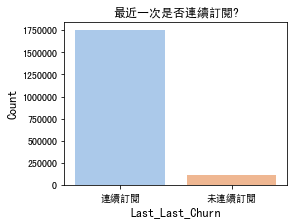

In [55]:
plt.figure(figsize=(4,3))
sns.countplot(x="last_last_churn", data=ft_last_last_churn, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last_Last_Churn', fontsize=12)
plt.xticks(np.arange(2), ('連續訂閱', '未連續訂閱'))
plt.title("最近一次是否連續訂閱?", fontsize=12)
plt.show()

In [56]:
# 存成csv
# ft_last_last_churn.to_csv('NewFeature_LastLastChurn.csv',index=False,header=True)

##### 製作前一次自動續約last_auto_renew特徵

In [57]:
# 定義前一次是否自動續約
def last_last_renew(df):
    ft_last_auto_renew = df[['msno','is_auto_renew']].groupby(by=['msno'],as_index=False).head(1)
    ft_last_auto_renew.rename(columns={'is_auto_renew':'last_auto_renew'}, inplace=True)
    return ft_last_auto_renew

In [58]:
ft_last_auto_renew = last_last_renew(KKboxTransac)
ft_last_auto_renew.head()

,msno,last_auto_renew
6797850,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0
1521480,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0
1498592,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
7798380,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1
14135498,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1


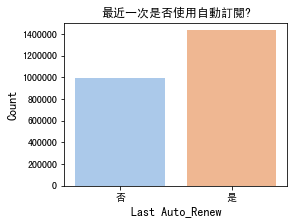

In [59]:
plt.figure(figsize=(4,3))
sns.countplot(x="last_auto_renew", data=ft_last_auto_renew, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Last Auto_Renew', fontsize=12)
plt.xticks(np.arange(2), ('否','是'))
plt.title("最近一次是否使用自動訂閱?", fontsize=12)
plt.show()

In [60]:
# 存成csv
# ft_last_auto_renew.to_csv('NewFeature_LastAutoRenew.csv',index=False,header=True)

##### 製作年齡區段age_level_code

In [61]:
# 確認members除去不合理值後之平均年齡
ft_mem_bd = KKboxMembers[['msno','bd']]
ft_mem_bd = ft_mem_bd[ft_mem_bd['bd'] < 100]
ft_mem_bd = ft_mem_bd[ft_mem_bd['bd'] > 0]
mem_avg_age = ft_mem_bd['bd'].mean()
mem_avg_age

29.483192442063373

In [62]:
def age_level_code(df):
    ft_mem_bd = df[['msno','bd']]
    # 去除不合理值
    ft_mem_bd = ft_mem_bd[ft_mem_bd['bd'] < 100]
    ft_mem_bd = ft_mem_bd[ft_mem_bd['bd'] > 0]
    # 以trans_date取得每個會員交易次數
    ft_bd = ft_mem_bd[['msno','bd']]
    # 將不同年齡做區段別(分為)
    max_bd = ft_bd['bd'].max()
    bins = [0,22,44,60,max_bd]
    ft_bd['age_level_code'] = pd.cut(ft_bd.bd, bins, labels= np.arange(len(bins)-1))
    # 拉掉交易次數
    ft_bd = ft_bd[['msno', 'age_level_code']]
    return ft_bd

In [63]:
ft_age_level_code = age_level_code(KKboxMembers)
ft_age_level_code['age_level_code'].unique()

[1, 0, 3, 2]
Categories (4, int64): [0 < 1 < 2 < 3]

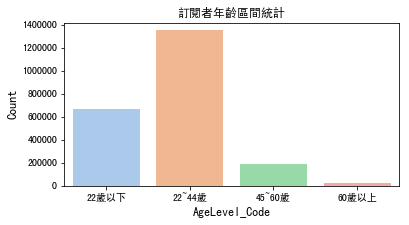

In [64]:
plt.figure(figsize=(6,3))
sns.countplot(x="age_level_code", data=ft_age_level_code, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('AgeLevel_Code', fontsize=12)
plt.title("訂閱者年齡區間統計", fontsize=12)
plt.xticks(np.arange(4), ('22歲以下', '22~44歲', '45~60歲', '60歲以上'))
plt.show()

In [65]:
# 存成csv
# ft_bd.to_csv('NewFeature_BdLevelCode.csv',index=False,header=True)

##### 製作age_under26

In [66]:
def age_under26(df):
    ft_age_under26 = df[['msno', 'bd']]
    # 去除不合理年齡值(取1~100歲)
    ft_age_under26 = ft_age_under26[ft_age_under26['bd'] < 100]
    ft_age_under26 = ft_age_under26[ft_age_under26['bd'] > 0]
    # 將26up與under26分成兩類
    ft_age_under26.rename(columns={'bd':'age_under26'}, inplace=True)
    ft_age_under26['age_under26'] = ft_age_under26.age_under26.apply(lambda x: 1 if x < 26 else 0)
    return ft_age_under26

In [67]:
ft_age_under26 = age_under26(KKboxMembers)
ft_age_under26.head()

,msno,age_under26
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,0
5,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,0
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,0
8,tKmbR4X5VXjHmxERrckawEMZ4znVy1lAQIR1vV5rdNk=,1
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,0


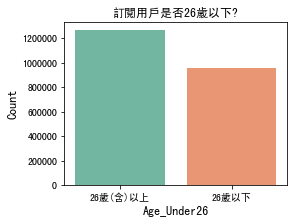

In [68]:
plt.figure(figsize=(4,3))
sns.countplot(x="age_under26", data=ft_age_under26, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age_Under26', fontsize=12)
plt.xticks(np.arange(2), ('26歲(含)以上','26歲以下'))
plt.title("訂閱用戶是否26歲以下?", fontsize=12)
plt.show()

In [69]:
# 存成csv
# ft_age_under26.to_csv('NewFeature_AgeUnder26.csv', index=False, header=True)

##### 製作特徵獲得折扣次數is_disount

In [70]:
def is_discount(df):
    ft_discount = df[['msno', 'plan_list_price', 'actual_amount_paid']]
    ft_discount['discount'] = ft_discount['plan_list_price'] - ft_discount['actual_amount_paid']
    ft_discount['is_discount'] = ft_discount.discount.apply(lambda x: 1 if x > 0 else 0)
    ft_discount = ft_discount.groupby('msno', as_index=False)['is_discount'].count()
    return ft_discount

In [71]:
ft_isdiscount = is_discount(KKboxTransac)
ft_isdiscount.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,msno,is_discount
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27


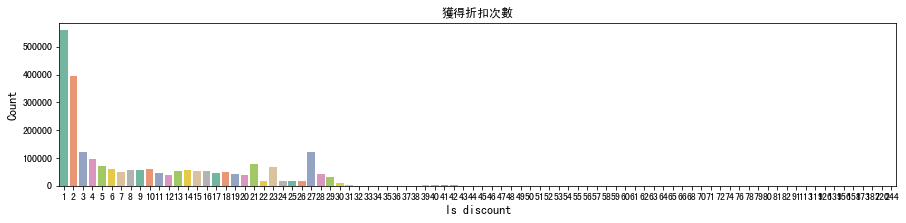

In [72]:
plt.figure(figsize=(15,3))
sns.countplot(x="is_discount", data=ft_isdiscount, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Is discount', fontsize=12)
plt.title("獲得折扣次數", fontsize=12)
plt.show()

In [73]:
# 存成csv
# ft_isdiscount.to_csv('NewFeature_IsDiscount.csv',index=False,header=True)

##### 製作特徵平均每日花費amount_per_day

In [74]:
def amount_per_day(df):
    ft_amount_per_day = df[['msno', 'actual_amount_paid', 'payment_plan_days']]
    # 去掉payment_plan_days為0的欄位
    ft_amount_per_day = ft_amount_per_day[ft_amount_per_day['payment_plan_days'] != 0]
    # 計算平均每天花費金額
    ft_amount_per_day['amount_per_day'] = ft_amount_per_day['actual_amount_paid'] / ft_amount_per_day['payment_plan_days']
    # 重新選取欄位
    ft_amount_per_day = ft_amount_per_day[['msno', 'amount_per_day']]
    # 合併msno，並做amount_per_day平均
    ft_amount_per_day = ft_amount_per_day.groupby('msno', as_index=False)['amount_per_day'].mean()
    return ft_amount_per_day

In [75]:
ft_amount_per_day = amount_per_day(KKboxTransac)
print(ft_amount_per_day.shape)
ft_amount_per_day.head()

(2426143, 2)


,msno,amount_per_day
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0.000
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,4.205
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,3.300
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,4.943
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,4.967


In [76]:
# 存成csv
# ft_amount_per_day.to_csv('NewFeature_AmountPerDay.csv',index=False,header=True)

##### 製作特徵_平均每日花費編碼amount_per_day_code

In [77]:
def amount_per_day_code(df):
    ft_amount_per_day = df[['msno', 'actual_amount_paid', 'payment_plan_days']]
    # 去掉payment_plan_days為0的欄位
    ft_amount_per_day = ft_amount_per_day[ft_amount_per_day['payment_plan_days'] != 0]
    # 計算平均每天花費金額
    ft_amount_per_day['amount_per_day'] = ft_amount_per_day['actual_amount_paid'] / ft_amount_per_day['payment_plan_days']
    # 重新選取欄位
    ft_amount_per_day = ft_amount_per_day[['msno', 'amount_per_day']]
    # 合併msno，並做amount_per_day平均
    ft_amount_per_day = ft_amount_per_day.groupby('msno', as_index=False)['amount_per_day'].mean()
    # 製作每日花費區間
    max_amount_pay_day = ft_amount_per_day['amount_per_day'].max()
    bins = [-1,2,4,6,max_amount_pay_day]
    ft_amount_per_day['amount_per_day_code'] = pd.cut(ft_amount_per_day.amount_per_day, bins, labels= np.arange(len(bins)-1))
    ft_amount_per_day = ft_amount_per_day[['msno', 'amount_per_day_code']]
    return ft_amount_per_day

In [78]:
ft_amount_per_day_code = amount_per_day_code(KKboxTransac)
print(ft_amount_per_day_code.shape)
ft_amount_per_day_code.head()

(2426143, 2)


,msno,amount_per_day_code
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2


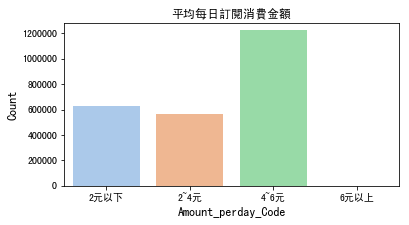

In [79]:
plt.figure(figsize=(6,3))
sns.countplot(x="amount_per_day_code", data=ft_amount_per_day_code, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Amount_perday_Code', fontsize=12)
plt.title("平均每日訂閱消費金額", fontsize=12)
plt.xticks(np.arange(4), ('2元以下', '2~4元', '4~6元', '6元以上'))
plt.show()

In [80]:
# 存成csv
ft_amount_per_day_code.to_csv('NewFeature_AmountPerDayCode.csv',index=False,header=True)

##### 製作特徵總會員日membership_days

In [81]:
def membership_days(df):
    ft_membership_days = df[['msno', 'trans_date', 'mem_expire_date']]
    ft_membership_days['membership'] = ft_membership_days['mem_expire_date'] - ft_membership_days['trans_date']
    ft_membership_days['membership_days'] = ft_membership_days['membership'] / np.timedelta64(1,'D')
    ft_membership_days = ft_membership_days[['msno', 'membership_days']]
    ft_membership_days = ft_membership_days.groupby('msno', as_index=False)['membership_days'].sum()
    return ft_membership_days

In [82]:
ft_membership_days = membership_days(KKboxTransac)
print(ft_membership_days.shape)
ft_membership_days.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(2426143, 2)


,msno,membership_days
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,5.000
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,881.000
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,150.000
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1031.000
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,821.000


In [83]:
# 存成csv
# ft_membership_days.to_csv('NewFeature_MembershipDays.csv',index=False,header=True)

##### 製作老客戶longtime_user(定義總時間一年以上)

In [84]:
def longtime_user(df):
    ft_membership_days = df[['msno', 'trans_date', 'mem_expire_date']]
    ft_membership_days['membership'] = ft_membership_days['mem_expire_date'] - ft_membership_days['trans_date']
    ft_membership_days['membership_days'] = ft_membership_days['membership'] / np.timedelta64(1,'D')
    # 取得總會員天數
    ft_longtime_user = ft_membership_days[['msno', 'membership_days']]
    # 合併同一user
    ft_longtime_user = ft_longtime_user.groupby('msno', as_index=False)['membership_days'].sum()
    # 定義longtime_user為超過365天者為1，未滿為0
    ft_longtime_user['longtime_user'] = (((ft_longtime_user['membership_days'] / 365).astype(int)) > 1).astype(int)
    # 僅選擇longtime_user欄位
    ft_longtime_user = ft_longtime_user[['msno', 'longtime_user']]
    return ft_longtime_user

In [85]:
ft_longtime_user = longtime_user(KKboxTransac)
print(ft_longtime_user.shape)
ft_longtime_user.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(2426143, 2)


,msno,longtime_user
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,1
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,1
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1


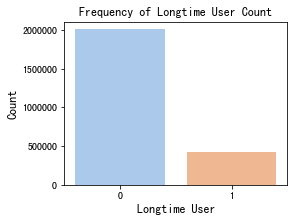

In [86]:
plt.figure(figsize=(4,3))
sns.countplot(x="longtime_user", data=ft_longtime_user, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Longtime User', fontsize=12)
plt.title("Frequency of Longtime User Count", fontsize=12)
plt.show()

In [87]:
# 存成csv
# ft_longtime_user.to_csv('NewFeature_LongTimeUser.csv',index=False,header=True)

##### 製作使否使用付款方式41

In [88]:
def pay_method_41(df):
    # 根據payment_method_id進行確認付款方式41的比例為多少
    ft_payment_method_id = df[['msno', 'payment_method_id']]
    # rename
    ft_payment_method_id.rename(columns={'payment_method_id':'pay_method_41_ratio'}, inplace=True)
    # 調整以編號41付款方式為1，非編號4付款方式為0
    ft_payment_method_id['pay_method_41_ratio'] = ft_payment_method_id.pay_method_41_ratio.apply(lambda x: 1 if x == 41 else 0)
    # 合併取得每位用戶使用編號41付款方式的比例
    ft_payment_method_id = ft_payment_method_id.groupby('msno', as_index=False)['pay_method_41_ratio'].mean()
    ft_payment_method_id['payment_method_41'] = ft_payment_method_id.pay_method_41_ratio.apply(lambda x: 1 if x>0.5 else 0)
    return ft_payment_method_id

In [89]:
ft_payment_method_41 = pay_method_41(KKboxTransac)
print(ft_payment_method_41.shape)
ft_payment_method_41.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


(2426143, 3)


,msno,pay_method_41_ratio,payment_method_41
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,0.000,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0.000,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,1.000,1
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,0.000,0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,1.000,1


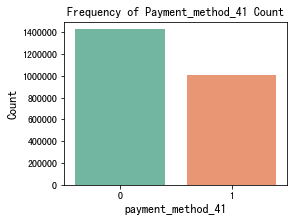

In [90]:
plt.figure(figsize=(4,3))
sns.countplot(x="payment_method_41", data=ft_payment_method_41, palette = "Set2")
plt.ylabel('Count', fontsize=12)
plt.xlabel('payment_method_41', fontsize=12)
plt.title("Frequency of Payment_method_41 Count", fontsize=12)
plt.show()

In [91]:
# 存成csv
# ft_payment_method_41.to_csv('NewFeature_PaymentMethodId41.csv',index=False,header=True)

##### 特徵city做ont-hot encoding

In [92]:
ft_city_encode = pd.get_dummies(KKboxMembers['city'], prefix='City')
ft_city_encode = pd.concat([KKboxMembers, ft_city_encode], axis=1)
ft_city_encode = ft_city_encode[['msno', 'City_1']]
ft_city_encode.head()

,msno,City_1
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,0


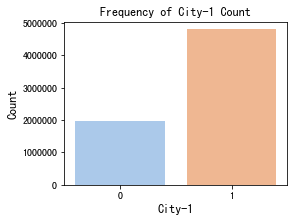

In [93]:
plt.figure(figsize=(4,3))
sns.countplot(x="City_1", data=ft_city_encode, palette = "pastel")
plt.ylabel('Count', fontsize=12)
plt.xlabel('City-1', fontsize=12)
plt.title("Frequency of City-1 Count", fontsize=12)
plt.show()

In [94]:
# 存成csv
# ft_city_encode.to_csv('NewFeature_City1.csv',index=False,header=True)

## 合併進Transaction特徵

In [95]:
print(list(KKboxTrainMembers.columns))
print(list(ft_trans_times_train.columns))

['msno', 'is_churn', 'city', 'bd', 'gender', 'registered_via', 'registration_init_time']
['msno', 'client_level_code']


In [96]:
# 合併進交易次數層別client_level_code
KKboxTrainMembersTran = pd.merge(KKboxTrainMembers, ft_trans_times_train, how='left', on=['msno'])

In [97]:
# rename bd -> age
# KKboxTrainMembersTran.rename(index=float, columns={'bd': 'age'}, inplace=True)
# 去除bd不合理值
# KKboxTrainMembersTran = KKboxTrainMembersTran[KKboxTrainMembersTran['age'] < 100]
# KKboxTrainMembersTran = KKboxTrainMembersTran[KKboxTrainMembersTran['age'] > 1]
# 修改bd缺失值
# KKboxTrainMembersTran['age'] = KKboxTrainMembersTran['age'].fillna(KKboxTrainMembersTran['age'].mean())

In [98]:
# 合併進age_under26
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_age_under26, how='left', on=['msno'])
# KKboxTrainMembersTran = KKboxTrainMembersTran.drop(columns=['bd'])

In [99]:
# 合併進連續/非連續訂閱者特徵last_last_churn
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_last_last_churn, how='left', on=['msno'])
# 處理缺失值
KKboxTrainMembersTran['last_last_churn'] = KKboxTrainMembersTran['last_last_churn'].fillna(-1)

In [100]:
# 合併進自動續約last_auto_renew
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_last_auto_renew, how='left', on=['msno'])

In [101]:
# 合併進年齡區段age_level_code
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_age_level_code, how='left', on=['msno'])
# 去除bd欄位
# KKboxTrainMembersTran = KKboxTrainMembersTran.drop(columns=['bd'])

In [102]:
# 消除重複項
# KKboxTrainMembersTran.drop_duplicates(subset=None, keep='first', inplace=True)

In [103]:
# 合併折扣次數is_discount
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_isdiscount, how='left', on=['msno'])

In [104]:
# 合併每日平均花費amount_per_day
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_amount_per_day, how='left', on=['msno'])

In [105]:
# 合併老客戶longtime_user
KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_longtime_user, how='left', on=['msno'])

In [106]:
# 合併city for one-hot encoding
# KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_city_encode, how='left', on=['msno'])

In [107]:
# 合併較常用付款方式41的用戶
# KKboxTrainMembersTran = pd.merge(KKboxTrainMembersTran, ft_payment_method_41, how='left', on=['msno'])
# KKboxTrainMembersTran = KKboxTrainMembersTran.drop(columns=['payment_method_41'])

---

In [108]:
print(KKboxTrainMembersTran.shape)
KKboxTrainMembersTran.head()

(970960, 15)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,client_level_code,age_under26,last_last_churn,last_auto_renew,age_level_code,is_discount,amount_per_day,longtime_user
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.000,28.000,1,3.000,2013-12-23,1,0.000,0.000,1,1,6,4.967,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.000,20.000,1,3.000,2013-12-23,1,1.000,0.000,0,0,6,4.483,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.000,18.000,1,3.000,2013-12-27,3,1.000,0.000,0,0,20,4.637,0
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,1.000,0.000,NaN,7.000,2014-01-09,4,nan,0.000,1,NaN,29,4.783,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.000,35.000,0,7.000,2014-01-25,4,0.000,0.000,1,1,32,3.817,1


In [109]:
KKboxTrainMembersTran.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970960 entries, 0 to 970959
Data columns (total 15 columns):
msno                      970960 non-null object
is_churn                  970960 non-null int64
city                      860967 non-null float64
bd                        860967 non-null float64
gender                    388905 non-null object
registered_via            860967 non-null float64
registration_init_time    860967 non-null datetime64[ns]
client_level_code         970960 non-null category
age_under26               386704 non-null float64
last_last_churn           970960 non-null float64
last_auto_renew           970960 non-null int8
age_level_code            386704 non-null category
is_discount               970960 non-null int64
amount_per_day            970959 non-null float64
longtime_user             970960 non-null int32
dtypes: category(2), datetime64[ns](1), float64(6), int32(1), int64(2), int8(1), object(2)
memory usage: 214.8 MB


---

In [113]:
KKboxTrainMembersTran.isnull().sum()

msno                      0
is_churn                  0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
client_level_code         0
age_under26               0
last_last_churn           0
last_auto_renew           0
age_level_code            0
is_discount               0
amount_per_day            0
longtime_user             0
dtype: int64

In [111]:
KKboxTrainMembersTran['client_level_code'] = KKboxTrainMembersTran['client_level_code'].astype('int8')
KKboxTrainMembersTran['age_level_code'] = KKboxTrainMembersTran['age_level_code'].astype('int8')

In [112]:
# 處理bd不合理值
KKboxTrainMembersTran = KKboxTrainMembersTran[KKboxTrainMembersTran['bd'] < 100]
KKboxTrainMembersTran = KKboxTrainMembersTran[KKboxTrainMembersTran['bd'] > 0]
# 處理bd缺失值
KKboxTrainMembersTran['bd'] = KKboxTrainMembersTran['bd'].fillna(KKboxTrainMembersTran['bd'].mean())
# 處理city缺失值
# KKboxTrainMembersTran['city'] = KKboxTrainMembersTran['city'].fillna('-1')
# 處理gender缺失值
KKboxTrainMembersTran['gender'] = KKboxTrainMembersTran['gender'].fillna(-1)
# 處理registered_via缺失值
KKboxTrainMembersTran['registered_via'] = KKboxTrainMembersTran['registered_via'].fillna(-1)
# 處理age_under26缺失值(依members除去不合理值之年齡平均為29歲，屬於0
KKboxTrainMembersTran['age_under26'] = KKboxTrainMembersTran['age_under26'].fillna(0)
# 處理age_level_code缺失值
KKboxTrainMembersTran['age_level_code'] = KKboxTrainMembersTran['age_level_code'].fillna(-1)
# 處理City-1的缺失值，因為不知道是否為city-1，所以把缺失值分成一類
# KKboxTrainMembersTran['City_1'] = KKboxTrainMembersTran['City_1'].fillna(-1)

# 刪除含缺失值的row
KKboxTrainMembersTran = KKboxTrainMembersTran.dropna()

In [435]:
KKboxTrainMembersTran.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time,client_level_code,age_under26,last_last_churn,last_auto_renew,age_level_code,is_discount,amount_per_day,longtime_user
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.000,28.000,1,3.000,2013-12-23,1,0.000,0.000,1,1,6,4.967,0
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.000,20.000,1,3.000,2013-12-23,1,1.000,0.000,0,0,6,4.483,0
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.000,18.000,1,3.000,2013-12-27,3,1.000,0.000,0,0,20,4.637,0
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.000,35.000,0,7.000,2014-01-25,4,0.000,0.000,1,1,32,3.817,1
7,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.000,28.000,0,3.000,2014-02-02,1,0.000,0.000,0,1,3,4.436,1


In [438]:
# 存入csv
# KKboxTrainMembersTran.to_csv('KKboxTrainMemTransac.csv',index=False,header=True)

##### 合併進Userlog特徵

In [114]:
UserLogSum.head()

,msno,sum_25,sum_50,sum_75,sum_985,sum_100,sum_unq,sum_secs,timeperiod,sum_25_avg,sum_50_avg,sum_75_avg,sum_985_avg,sum_100_avg
0,+++ceu6HDcfpatMwLD3loHSqgjp1iI4VrnAFTwRqcXw=,0,0,0,0,76,9,20374,18,0.000,0.000,0.000,0.000,4.222
1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,0,0,1,105,94,27345,1,3.000,0.000,0.000,1.000,105.000
2,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,18,7,3,5,114,117,32336,4,4.500,1.750,0.750,1.250,28.500
3,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,306,144,155,271,1236,1517,395171,79,3.873,1.823,1.962,3.430,15.646
4,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,499,160,133,99,31465,28202,7773370,756,0.660,0.212,0.176,0.131,41.620


In [115]:
KKboxMemTranUserlog = pd.merge(KKboxTrainMembersTran, UserLogSum, how='left', on='msno')

In [125]:
KKboxMemTranUserlog.dropna()
print(KKboxMemTranUserlog.shape)
KKboxMemTranUserlog.head()

(386703, 28)


,msno,is_churn,city,bd,gender,registered_via,registration_init_time,client_level_code,age_under26,last_last_churn,...,sum_985,sum_100,sum_unq,sum_secs,timeperiod,sum_25_avg,sum_50_avg,sum_75_avg,sum_985_avg,sum_100_avg
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1,5.000,28.000,1,3.000,2013-12-23,1,0.000,0.000,...,27.000,1095.000,197.000,236255.000,68.000,2.265,0.647,0.309,0.397,16.103
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,13.000,20.000,1,3.000,2013-12-23,1,1.000,0.000,...,19.000,483.000,420.000,131851.000,357.000,0.241,0.081,0.031,0.053,1.353
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,13.000,18.000,1,3.000,2013-12-27,3,1.000,0.000,...,210.000,3798.000,8811.000,1075051.000,559.000,11.453,0.760,0.358,0.376,6.794
3,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,13.000,35.000,0,7.000,2014-01-25,4,0.000,0.000,...,42.000,1792.000,1969.000,460042.000,702.000,0.239,0.157,0.105,0.060,2.553
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,9.000,28.000,0,3.000,2014-02-02,1,0.000,0.000,...,268.000,12692.000,9862.000,3363080.000,787.000,1.464,0.404,0.333,0.341,16.127


In [129]:
KKboxMemTranUserlog = KKboxMemTranUserlog[KKboxMemTranUserlog['sum_secs'] >= 0]

In [140]:
KKboxMemTranUserlog = KKboxMemTranUserlog[KKboxMemTranUserlog['timeperiod'] != 0]

In [141]:
# 存入csv
KKboxMemTranUserlog.to_csv('KKboxMemTranUserlog.csv',index=False,header=True)

In [142]:
list(KKboxMemTranUserlog.columns)

['msno',
 'is_churn',
 'city',
 'bd',
 'gender',
 'registered_via',
 'registration_init_time',
 'client_level_code',
 'age_under26',
 'last_last_churn',
 'last_auto_renew',
 'age_level_code',
 'is_discount',
 'amount_per_day',
 'longtime_user',
 'sum_25',
 'sum_50',
 'sum_75',
 'sum_985',
 'sum_100',
 'sum_unq',
 'sum_secs',
 'timeperiod',
 'sum_25_avg',
 'sum_50_avg',
 'sum_75_avg',
 'sum_985_avg',
 'sum_100_avg']

---

### ※特徵觀察整理

|特徵|型態|說明|
|:---:|:---:|:---:|
|msno|str|user id|
|is_churn|str|流失值|
|city|str(one-hot encode)|用戶所在地區|
|bd|float|年齡|
|gender|str|性別|
|registered_via|str(one-hot encode)|註冊路徑|
|registration_init_time|date|註冊日期|
|payment_method_id|str(one-hot encode)|付款方式|
|payment_plan_days|float|付款方案天數|
|plan_list_price|float|計畫方案價格|
|actual_amount_paid|float|實際方案價格|
|is_auto_renew|str|自動續約|
|transaction_date|date|交易日期|
|membership_expire_date|date|退訂或方案到期日|
|is_cancel|str|是否手動退訂|
|num_25/50/70/985/100|int|用戶聽歌完整度(%)|
|num_unq|沒有說明|沒有說明|
|total_secs|float|聽歌長度(sec)/day|

#### Submission & Train-----
* Submission作為測試集主要針對2017年3月退訂的客戶，於2017年4月是否續訂?Training Data則是2017年2月以前退訂，且30天內有無訂閱動作做為流失判定。Training Data的流失/續訂比差異較大(超過1:10)。

#### Members-----
* 特徵2. 用戶所在地區(city)；依目前觀察到的應有21個城市，但是沒有詳細說明哪些城市(且都以編碼表示)，只能進行分類以及各自城市用戶數有多少。
* 特徵3. 年齡(bd)：年齡的數據有點亂，必須要篩掉一些不合理值。
* 特徵4. 性別(gender)：性別的缺失值最多，達到約60%，可能要考慮如何處理缺失值。
* 特徵5. 登入方式(registered_via)：共有5種登入方式，沒有特別說明，可能是不同的裝置。
* 特徵6. 初始創建帳號日期(registration_init_time)：或許可以比較老用戶與新用戶流失值，以及比較聽歌時間的影響。
#### 交易紀錄-----
* 特徵7. 付款方式(payment_method_id)：交易付款方式都是以代號顯示，只能做分類(或許可以針對現有的付款方式去兜看看)。
* 特徵8. 一次付款方案天數(payment_plan_days)：以天數為單位，觀察資料以30天為最多(月租)。
* 特徵9. 計畫方案價格(plan_list_price)：應該與方案天數有高度相關(?
* 特徵10. 實際付費價格(actual_amount_paid)：與特徵9應該高度相關(重合?
* 特徵11. 自動續約(is_auto_renew)
* 特徵12+13. 交易日期(transaction_date)&退訂或合約到期日(membership_expire_date)：若這兩者日期相減等同合約日期則表示合約到期；如相減不等於合約到期，則表示客戶提前退訂，可以觀察是否影響到後續流失率(30天內不再續訂)。
* 特徵14. 取消(is_cancel)：客戶是否自動退訂，客戶自動退訂不等於流失(因為本資料流失的定義為退訂後30天沒有任何交易資料才算，所以有可能客戶退訂是為了要訂其他不同天方案。
#### 用戶紀錄(聽歌)-----
* 特徵15. 用戶聽歌完整度(num_25/50/70/985/100)：98.5%應該可以與100%完整聽完一樣意思(合併?)；聽不到25%的比例多的話是否代表沒有喜歡聽的類型，可能與流失值有關(?
* 特徵16. num_unq：沒有說明。
* 特徵17. 總聽歌長度(total_secs)：可以與註冊時間長短比例做比較來確認與流失值的關係(?
* 特徵18. 用戶id(msno)：可以拿來在不同資料做欄位對應。

---